# Effetto del PVE sul profilo - Notebook 1.4

Import delle librerie necessarie per la simulazione

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

Simuliamo un oggetto di intensità 255 su sfondo a intensità nulla e aumentiamo il fattore PVE tramite filtro gaussiano per apprezzarne l'effetto sul profilo. 

Il profilo viene tracciato orizzontalmente

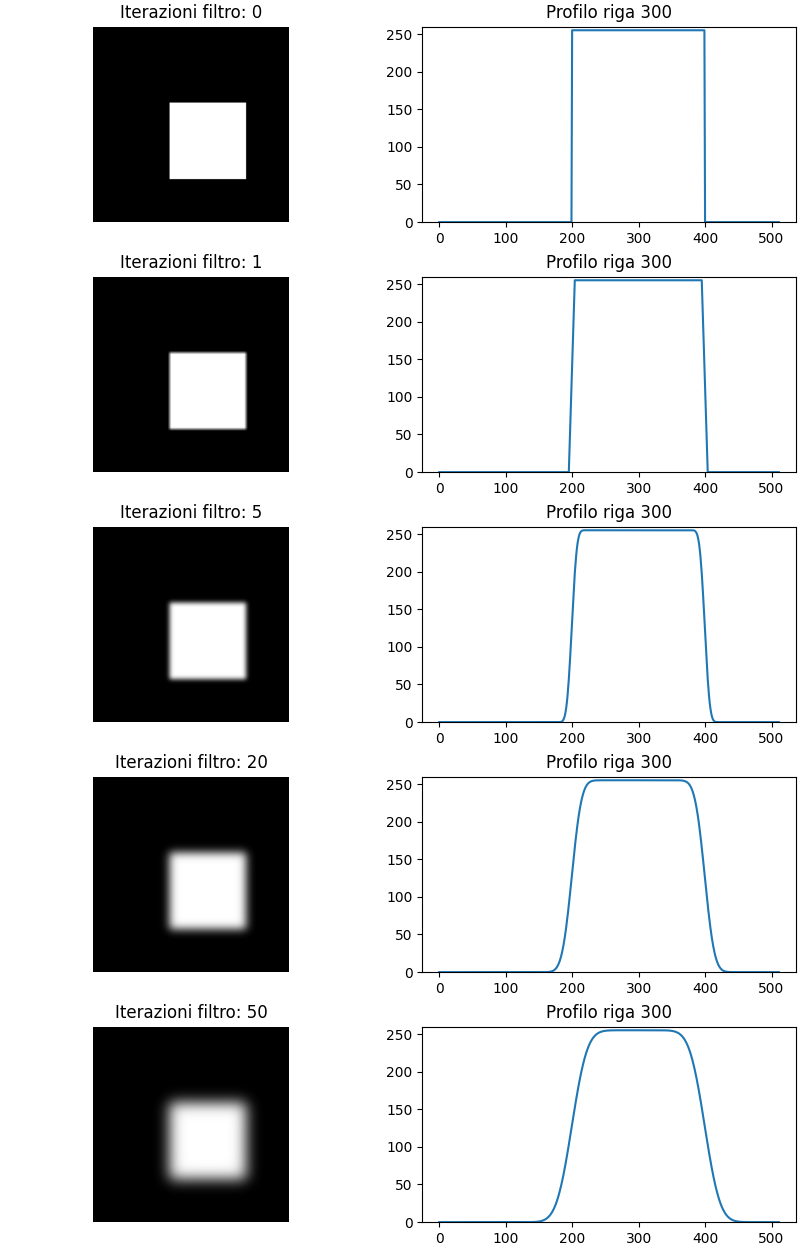

In [17]:
# immagine iniziale
dim = 512
im0 = np.zeros((dim, dim))
im0[200:400, 200:400] = 255

# kernel
ksize = 9
h = np.ones((ksize, ksize)) / (ksize**2)

# numero di volte in cui viene applicato il filtraggio, per simulare un PVE sempre maggiore
n_iters = [0, 1, 5, 20, 50]

fig, ax = plt.subplots(
    len(n_iters), 2,
    figsize=(8, 2.5 * len(n_iters)),
    constrained_layout=True
)

for i, n in enumerate(n_iters):

    im = im0.copy()
    for _ in range(n):
        im = ndi.convolve(im, h)

    # immagine
    ax[i, 0].imshow(im, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].set_title(f"Iterazioni filtro: {n}")
    ax[i, 0].axis("off")

    # profilo
    ax[i, 1].plot(im[300, :])
    ax[i, 1].set_ylim(0, 260)
    ax[i, 1].set_title("Profilo riga 300")

plt.show()
